In [8]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Expresiones regulares y procesamiento de strings
import re
import string

# ==== Librerías de NLP ====
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# ==== Librerías de Machine Learning ====
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Descargar recursos esenciales de NLTK (ejecutar una vez, comentar después de la primera ejecución)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Configurar estética de gráficos para mejores visuales
plt.style.use('ggplot')
sns.set(style='whitegrid')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\osorn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osorn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\osorn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Cargando el conjunto de datos**

In [9]:
import pandas as pd

# Cargar conjunto de datos desde el repositorio de Hugging Face
splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/google-research-datasets/poem_sentiment/" + splits["train"])
df_validation = pd.read_parquet("hf://datasets/google-research-datasets/poem_sentiment/" + splits["validation"])
df_test = pd.read_parquet("hf://datasets/google-research-datasets/poem_sentiment/" + splits["test"])

In [10]:
# Explorar la estructura del conjunto de datos
print("=== RESUMEN DEL CONJUNTO DE DATOS ===")
print(f"Forma del conjunto de entrenamiento: {df_train.shape}")
print(f"Forma del conjunto de validación: {df_validation.shape}")
print(f"Forma del conjunto de prueba: {df_test.shape}")

print("\n=== COLUMNAS ===")
print("Columnas:", df_train.columns.tolist())

print("\n=== PRIMERAS FILAS DEL CONJUNTO DE ENTRENAMIENTO ===")
print(df_train.head())

print("\n=== TIPOS DE DATOS ===")
print(df_train.dtypes)

print("\n=== VALORES FALTANTES ===")
print(df_train.isnull().sum())

print("\n=== DISTRIBUCIÓN DE ETIQUETAS ===")
print(df_train['label'].value_counts())

=== RESUMEN DEL CONJUNTO DE DATOS ===
Forma del conjunto de entrenamiento: (892, 3)
Forma del conjunto de validación: (105, 3)
Forma del conjunto de prueba: (104, 3)

=== COLUMNAS ===
Columnas: ['id', 'verse_text', 'label']

=== PRIMERAS FILAS DEL CONJUNTO DE ENTRENAMIENTO ===
   id                                         verse_text  label
0   0  with pale blue berries. in these peaceful shad...      1
1   1                it flows so long as falls the rain,      2
2   2                 and that is why, the lonesome day,      0
3   3  when i peruse the conquered fame of heroes, an...      3
4   4            of inward strife for truth and liberty.      3

=== TIPOS DE DATOS ===
id             int32
verse_text    object
label          int64
dtype: object

=== VALORES FALTANTES ===
id            0
verse_text    0
label         0
dtype: int64

=== DISTRIBUCIÓN DE ETIQUETAS ===
label
2    555
0    155
1    133
3     49
Name: count, dtype: int64


=== TEXTOS DE MUESTRA POR ETIQUETA ===

--- ETIQUETA 0 (Cantidad: 155) ---
1. and that is why, the lonesome day,
2. and so on. then a worthless gaud or two,
3. sounded o'er earth and sea its blast of war,

--- ETIQUETA 1 (Cantidad: 133) ---
1. with pale blue berries. in these peaceful shades--
2. that has a charmingly bourbon air.
3. brightly expressive as the twins of leda,

--- ETIQUETA 2 (Cantidad: 555) ---
1. it flows so long as falls the rain,
2. and very venus of a pipe.
3. who the man, who, called a brother.

--- ETIQUETA 3 (Cantidad: 49) ---
1. when i peruse the conquered fame of heroes, and the victories of mighty generals, i do not envy the generals,
2. of inward strife for truth and liberty.
3. the red sword sealed their vows!

=== ESTADÍSTICAS DE LONGITUD DE TEXTO ===
count    892.000000
mean      38.337444
std       11.535211
min        7.000000
25%       31.000000
50%       38.000000
75%       44.000000
max      109.000000
Name: text_length, dtype: float64


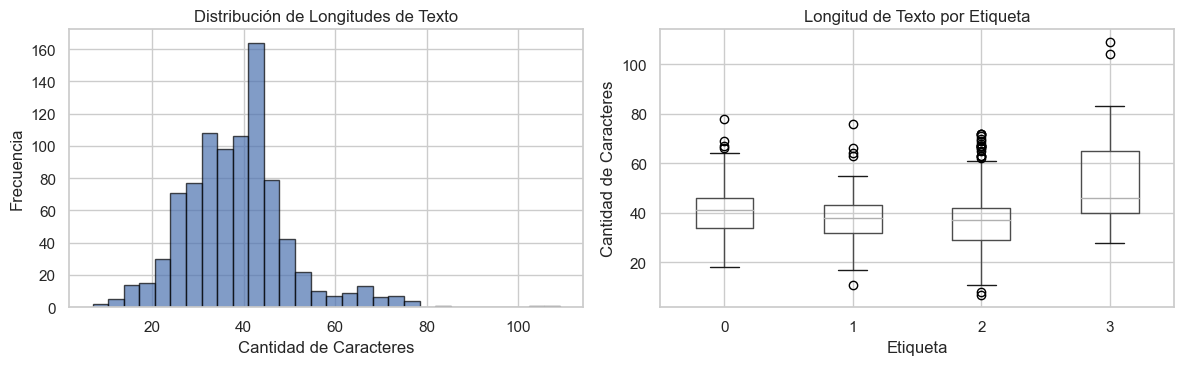

In [11]:
# Examinar textos de muestra para cada etiqueta para entender las categorías de sentimiento
print("=== TEXTOS DE MUESTRA POR ETIQUETA ===")
for label in sorted(df_train['label'].unique()):
    print(f"\n--- ETIQUETA {label} (Cantidad: {len(df_train[df_train['label'] == label])}) ---")
    samples = df_train[df_train['label'] == label]['verse_text'].head(3)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}")

# También revisar la distribución de longitud de los textos
print("\n=== ESTADÍSTICAS DE LONGITUD DE TEXTO ===")
df_train['text_length'] = df_train['verse_text'].str.len()
print(df_train['text_length'].describe())

# Visualizar la distribución de longitud de texto
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_train['text_length'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribución de Longitudes de Texto')
plt.xlabel('Cantidad de Caracteres')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df_train.boxplot(column='text_length', by='label', ax=plt.gca())
plt.title('Longitud de Texto por Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de Caracteres')
plt.suptitle('')

plt.tight_layout()
plt.show()